# **Dataset: 'catdogmonkey' with annotations**

**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
from PIL import Image
import cv2

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import tensorflow as tf

2024-05-08 08:17:50.109608: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-08 08:17:50.109778: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-08 08:17:50.268688: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


**Displaying Annotated Images**

Image Name:  dog-Walk-6-_JPG.rf.0973c1864a80554346a093622efbbebb.jpg


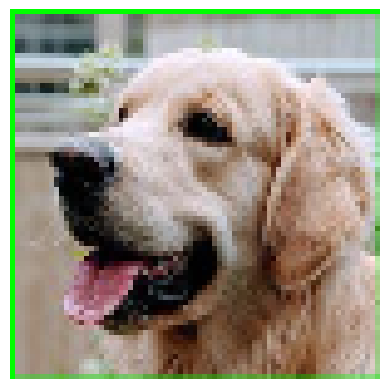

Image Name:  806de635-cats_and_dogs_4_jpg.rf.4cea0d91840baf40dbea23d4ab62d2e7.jpg


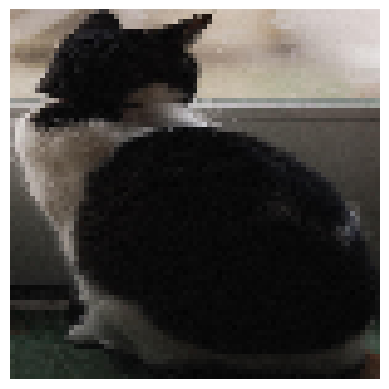

Image Name:  Pet-Eat-61-_JPG.rf.f390532269c6530c47ece7459fc8dd82.jpg


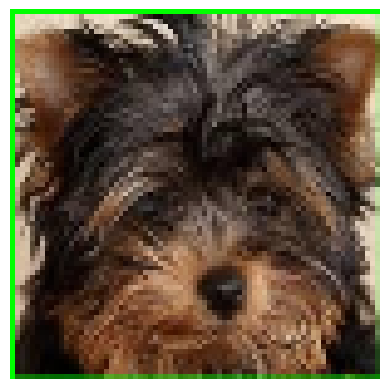

Image Name:  0947-BVhOGvKo4GQ_jpg.rf.9b7374c383ef85d4eb82d7806066d723.jpg


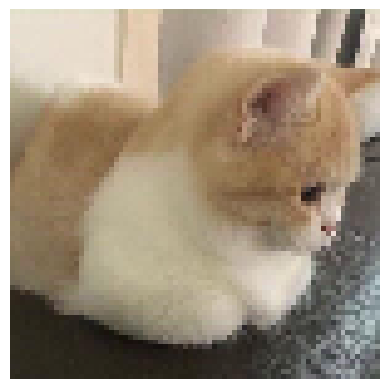

Image Name:  0827-9fQWsqEDiX0_jpg.rf.b44e2a7568e05a372d46c6214def58d7.jpg


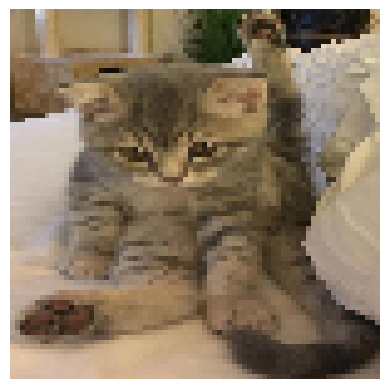

Image Name:  Dog-Sleep-134-_jpeg.rf.9709a5c285d112150894e821ed7817ba.jpg


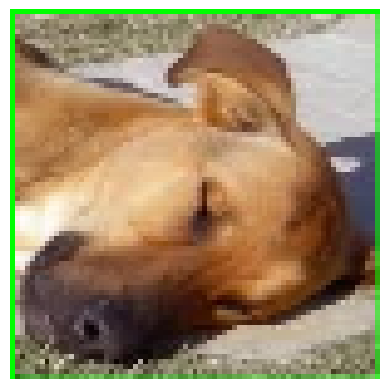

Image Name:  dog-Walk-14-_JPG.rf.afdf5f5f479431fc77bd1ca3fd9b6454.jpg


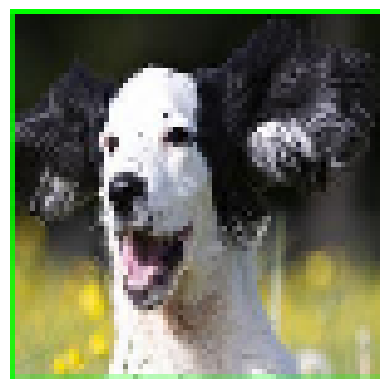

Image Name:  dog-Walk-106-_JPG.rf.fcb37613ef0d0b5ef76c66e7a7a54111.jpg


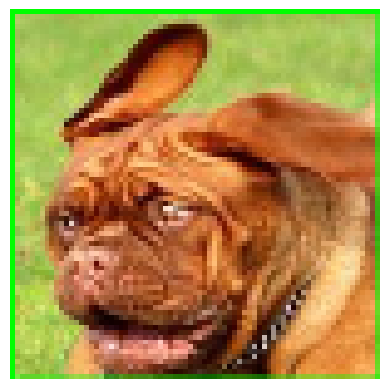

Image Name:  dog-Sleep-44-_JPG.rf.0b294f858a4d5c693da225bdea44c998.jpg


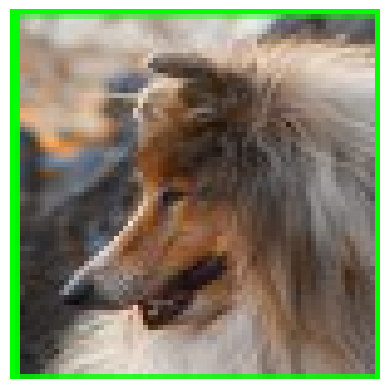

In [2]:
images_dir = "/kaggle/input/catdogmonkey/train/images"
labels_dir = "/kaggle/input/catdogmonkey/train/labels"

def read_labels(image_name):
    label_file = os.path.join(labels_dir, image_name.replace(".jpg", ".txt"))
    with open(label_file, "r") as file:
        lines = file.readlines()
        # Extract class and bounding box dimensions
        class_number, x, y, width, height = map(float, lines[0].split())
        return int(class_number), x, y, width, height

# Function to draw bounding boxes on images
def draw_boxes(image, x, y, width, height):
    x1 = int((x - width / 2) * image.shape[1])
    y1 = int((y - height / 2) * image.shape[0])
    x2 = int((x + width / 2) * image.shape[1])
    y2 = int((y + height / 2) * image.shape[0])
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Function to read images, extract bounding boxes, and display
def display_images_with_boxes():
    count = 0
    for image_name in os.listdir(images_dir):
        count += 1
        if count == 10:
            break
        if image_name.endswith(".jpg"):
            # Read image
            image_path = os.path.join(images_dir, image_name)
            image = cv2.imread(image_path)
            
            # Check if the image is successfully loaded
            if image is None:
                print(f"Error: Unable to read image '{image_name}'")
                continue
            
            # Read corresponding label
            class_number, x, y, width, height = read_labels(image_name)
            # Draw bounding box on image
            draw_boxes(image, x, y, width, height)
            
            # Extract region of interest (ROI) corresponding to bounding box
            roi_x1 = int((x - width / 2) * image.shape[1])
            roi_y1 = int((y - height / 2) * image.shape[0])
            roi_x2 = int((x + width / 2) * image.shape[1])
            roi_y2 = int((y + height / 2) * image.shape[0])
            roi = image[roi_y1:roi_y2, roi_x1:roi_x2]
            roi = cv2.resize(roi, (75, 75))
            # Check if the ROI is successfully extracted
            if roi.size == 0:
                print(f"Error: Unable to extract ROI from image '{image_name}'")
                print(f"Bounding Box Coordinates: (x={x}, y={y}), Width={width}, Height={height}")
                print(f"Image Dimensions: {image.shape}")
                continue
                
            # Display only the bounding box region
            print("Image Name: ", image_name)
            plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
            plt.axis('off')
            plt.show()
            
# Call the function to display images with bounding boxes
display_images_with_boxes()

Image Name:  dog-Walk-6-_JPG.rf.0973c1864a80554346a093622efbbebb.jpg


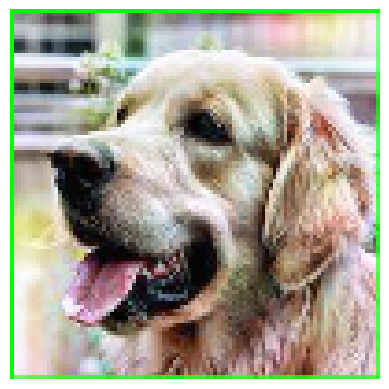

Image Name:  806de635-cats_and_dogs_4_jpg.rf.4cea0d91840baf40dbea23d4ab62d2e7.jpg


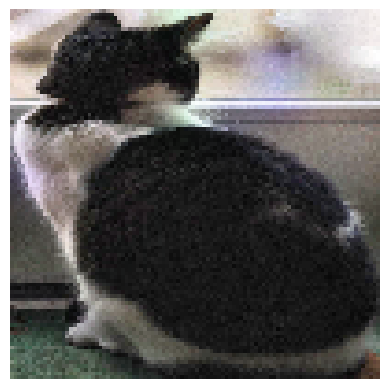

Image Name:  Pet-Eat-61-_JPG.rf.f390532269c6530c47ece7459fc8dd82.jpg


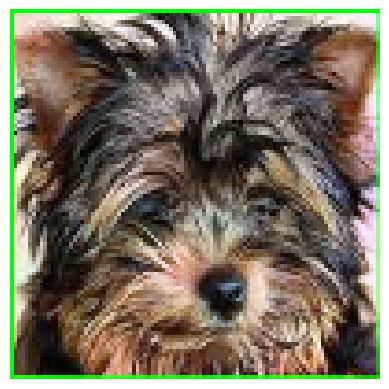

Image Name:  0947-BVhOGvKo4GQ_jpg.rf.9b7374c383ef85d4eb82d7806066d723.jpg


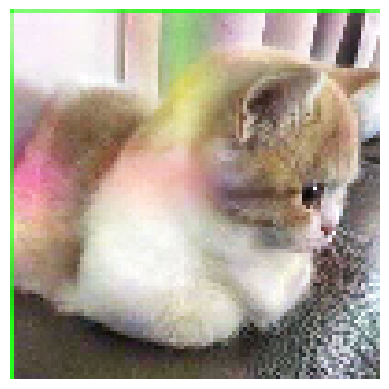

Image Name:  0827-9fQWsqEDiX0_jpg.rf.b44e2a7568e05a372d46c6214def58d7.jpg


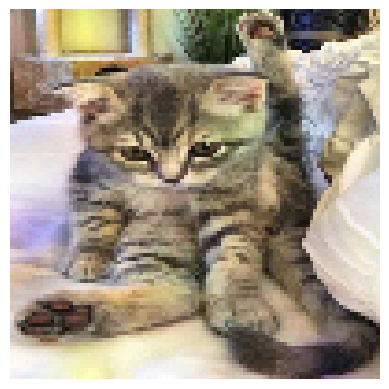

Image Name:  Dog-Sleep-134-_jpeg.rf.9709a5c285d112150894e821ed7817ba.jpg


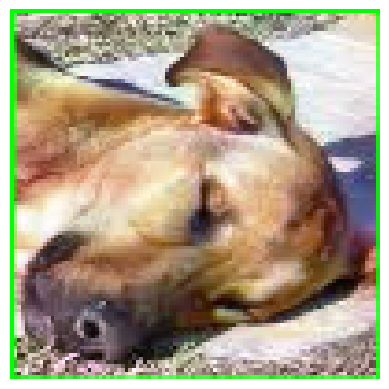

Image Name:  dog-Walk-14-_JPG.rf.afdf5f5f479431fc77bd1ca3fd9b6454.jpg


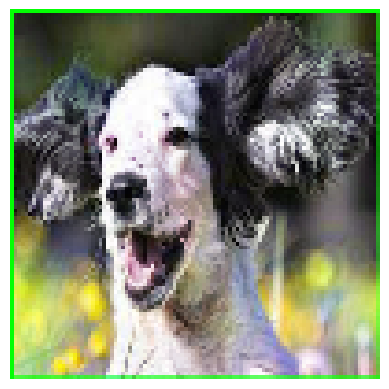

Image Name:  dog-Walk-106-_JPG.rf.fcb37613ef0d0b5ef76c66e7a7a54111.jpg


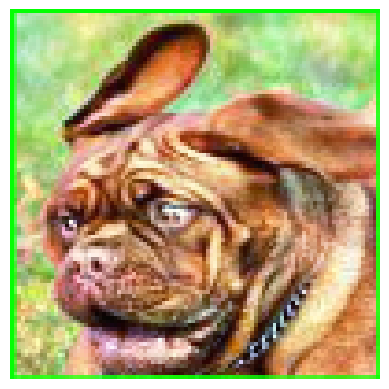

Image Name:  dog-Sleep-44-_JPG.rf.0b294f858a4d5c693da225bdea44c998.jpg


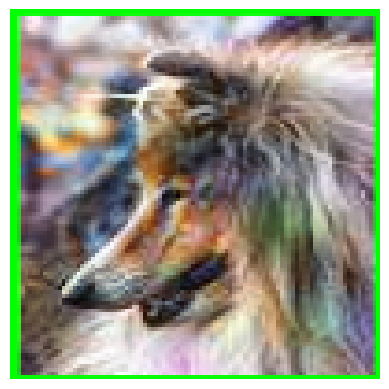

In [32]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

images_dir = "/kaggle/input/catdogmonkey/train/images"
labels_dir = "/kaggle/input/catdogmonkey/train/labels"

def read_labels(image_name):
    label_file = os.path.join(labels_dir, image_name.replace(".jpg", ".txt"))
    with open(label_file, "r") as file:
        lines = file.readlines()
        # Extract class and bounding box dimensions
        class_number, x, y, width, height = map(float, lines[0].split())
        return int(class_number), x, y, width, height

# Function to draw bounding boxes on images
def draw_boxes(image, x, y, width, height):
    x1 = int((x - width / 2) * image.shape[1])
    y1 = int((y - height / 2) * image.shape[0])
    x2 = int((x + width / 2) * image.shape[1])
    y2 = int((y + height / 2) * image.shape[0])
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Function to read images, extract bounding boxes, and display
def display_images_with_boxes():
    count = 0
    for image_name in os.listdir(images_dir):
        count += 1
        if count == 10:
            break
        if image_name.endswith(".jpg"):
            # Read image
            image_path = os.path.join(images_dir, image_name)
            image = cv2.imread(image_path)
            
            # Check if the image is successfully loaded
            if image is None:
                print(f"Error: Unable to read image '{image_name}'")
                continue
            
            # Enhance image
            
            
            # Read corresponding label
            class_number, x, y, width, height = read_labels(image_name)
            # Draw bounding box on image
            draw_boxes(image, x, y, width, height)
            
            # Extract region of interest (ROI) corresponding to bounding box
            roi_x1 = int((x - width / 2) * image.shape[1])
            roi_y1 = int((y - height / 2) * image.shape[0])
            roi_x2 = int((x + width / 2) * image.shape[1])
            roi_y2 = int((y + height / 2) * image.shape[0])
            roi = image[roi_y1:roi_y2, roi_x1:roi_x2]
            roi = cv2.resize(roi, (100, 100))
            roi = enhance_image(roi)
            
            # Check if the ROI is successfully extracted
            if roi.size == 0:
                print(f"Error: Unable to extract ROI from image '{image_name}'")
                print(f"Bounding Box Coordinates: (x={x}, y={y}), Width={width}, Height={height}")
                print(f"Image Dimensions: {enhanced_image.shape}")
                continue
                
            # Display only the bounding box region
            print("Image Name: ", image_name)
            plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
            plt.axis('off')
            plt.show()

def enhance_image(image):
    # Split the image into individual color channels
    b, g, r = cv2.split(image)

    # Apply CLAHE to each color channel
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced_b = clahe.apply(b)
    enhanced_g = clahe.apply(g)
    enhanced_r = clahe.apply(r)

    # Merge the enhanced color channels back into an RGB image
    enhanced_image = cv2.merge([enhanced_b, enhanced_g, enhanced_r])

    return enhanced_image


# Call the function to display images with bounding boxes
display_images_with_boxes()


**Using enhancement**

In [33]:
# RESIZING TO 80,80
images_dir = "/kaggle/input/catdogmonkey/train/images"
labels_dir = "/kaggle/input/catdogmonkey/train/labels"

features = []
labels = []

# Function to read label files
def read_labels(image_name):
    label_file = os.path.join(labels_dir, image_name.replace(".jpg", ".txt"))
    with open(label_file, "r") as file:
        lines = file.readlines()
        # Extract class and bounding box dimensions
        class_number, x, y, width, height = map(float, lines[0].split())
        return int(class_number), x, y, width, height

# Function to draw bounding boxes on images
def draw_boxes(image, x, y, width, height):
    x1 = int((x - width / 2) * image.shape[1])
    y1 = int((y - height / 2) * image.shape[0])
    x2 = int((x + width / 2) * image.shape[1])
    y2 = int((y + height / 2) * image.shape[0])
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

def enhance_image(image):
    # Split the image into individual color channels
    b, g, r = cv2.split(image)

    # Apply CLAHE to each color channel
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced_b = clahe.apply(b)
    enhanced_g = clahe.apply(g)
    enhanced_r = clahe.apply(r)

    # Merge the enhanced color channels back into an RGB image
    enhanced_image = cv2.merge([enhanced_b, enhanced_g, enhanced_r])

    return enhanced_image


# Function to read images, extract bounding boxes, and display
def display_images_with_boxes_enhanced(features, labels):
    
    max_width = 0
    max_height = 0
    for image_name in os.listdir(images_dir):
        if image_name.endswith(".jpg"):
            # Read image
            image_path = os.path.join(images_dir, image_name)
            image = cv2.imread(image_path)
            # Check if the image is successfully loaded
            if image is None:
                print(f"Error: Unable to read image '{image_name}'")
                continue
            # Read corresponding label
            class_number, x, y, width, height = read_labels(image_name)
            # Draw bounding box on image
            draw_boxes(image, x, y, width, height)
            
            # Extract region of interest (ROI) corresponding to bounding box
            roi_x1 = int((x - width / 2) * image.shape[1])
            roi_y1 = int((y - height / 2) * image.shape[0])
            roi_x2 = int((x + width / 2) * image.shape[1])
            roi_y2 = int((y + height / 2) * image.shape[0])
            roi = image[roi_y1:roi_y2, roi_x1:roi_x2]
            
            
            max_width = max(max_width, roi.shape[1])
            max_height = max(max_height, roi.shape[0])
            roi = cv2.resize(roi, (100, 100))
            roi = enhance_image(roi)
            img_array1 = np.array(roi).flatten()
            features.append(img_array1)
            labels.append(class_number)

            '''
            if roi.size == 0:
                print(f"Error: Unable to extract ROI from image '{image_name}'")
                print(f"Bounding Box Coordinates: (x={x}, y={y}), Width={width}, Height={height}")
                print(f"Image Dimensions: {image.shape}")
                continue
            '''
    '''
    print("Display:",max_height, max_width)
    padded_features = []
    for image in features:
        print("Image:", image)
        padded_image = np.zeros((max_height), dtype=np.uint8)
        print("Pad:", padded_image)
        padded_image[image.shape[1]] = image
        padded_features.append(padded_image)
    padded_features = np.array(padded_features)
    return padded_features, labels
    '''
    features = np.array(features)
    labels = np.array(labels)
    return features, labels
    
# Call the function to display images with bounding boxes

features, labels = display_images_with_boxes_enhanced(features, labels)
print("Features:",features)
print("Labels:",labels)

Features: [[  3 255   3 ...  26 255  27]
 [164 163 186 ...  45  57  78]
 [  3 255   3 ...   6 225   8]
 ...
 [214 253 161 ... 198 223 231]
 [  3 255   3 ...  65 146  75]
 [  3 255   3 ...   6 255   8]]
Labels: [1 0 1 ... 0 2 1]


**Feature Extraction**

In [67]:
# RESIZING TO 80,80
images_dir = "/kaggle/input/catdogmonkey/train/images"
labels_dir = "/kaggle/input/catdogmonkey/train/labels"

features = []
labels = []

# Function to read label files
def read_labels(image_name):
    label_file = os.path.join(labels_dir, image_name.replace(".jpg", ".txt"))
    with open(label_file, "r") as file:
        lines = file.readlines()
        # Extract class and bounding box dimensions
        class_number, x, y, width, height = map(float, lines[0].split())
        return int(class_number), x, y, width, height

# Function to draw bounding boxes on images
def draw_boxes(image, x, y, width, height):
    x1 = int((x - width / 2) * image.shape[1])
    y1 = int((y - height / 2) * image.shape[0])
    x2 = int((x + width / 2) * image.shape[1])
    y2 = int((y + height / 2) * image.shape[0])
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Function to read images, extract bounding boxes, and display
def display_images_with_boxes(features, labels):
    
    max_width = 0
    max_height = 0
    for image_name in os.listdir(images_dir):
        if image_name.endswith(".jpg"):
            # Read image
            image_path = os.path.join(images_dir, image_name)
            image = cv2.imread(image_path)
            # Check if the image is successfully loaded
            if image is None:
                print(f"Error: Unable to read image '{image_name}'")
                continue
            # Read corresponding label
            class_number, x, y, width, height = read_labels(image_name)
            # Draw bounding box on image
            draw_boxes(image, x, y, width, height)
            
            # Extract region of interest (ROI) corresponding to bounding box
            roi_x1 = int((x - width / 2) * image.shape[1])
            roi_y1 = int((y - height / 2) * image.shape[0])
            roi_x2 = int((x + width / 2) * image.shape[1])
            roi_y2 = int((y + height / 2) * image.shape[0])
            roi = image[roi_y1:roi_y2, roi_x1:roi_x2]
            
            max_width = max(max_width, roi.shape[1])
            max_height = max(max_height, roi.shape[0])
            roi = cv2.resize(roi, (75, 75))
            image = cv2.resize(image, (100, 100))
            img_array1 = np.array(image).flatten()
            features.append(img_array1)
            labels.append(class_number)

            '''
            if roi.size == 0:
                print(f"Error: Unable to extract ROI from image '{image_name}'")
                print(f"Bounding Box Coordinates: (x={x}, y={y}), Width={width}, Height={height}")
                print(f"Image Dimensions: {image.shape}")
                continue
            '''
    '''
    print("Display:",max_height, max_width)
    padded_features = []
    for image in features:
        print("Image:", image)
        padded_image = np.zeros((max_height), dtype=np.uint8)
        print("Pad:", padded_image)
        padded_image[image.shape[1]] = image
        padded_features.append(padded_image)
    padded_features = np.array(padded_features)
    return padded_features, labels
    '''
    features = np.array(features)
    labels = np.array(labels)
    return features, labels
    
# Call the function to display images with bounding boxes

features, labels = display_images_with_boxes(features, labels)
print("Features:",features)
print("Labels:",labels)

Features: [[180 179 177 ...  11  28  22]
 [ 39  38  40 ...  87 101 120]
 [253 253 253 ... 248 248 248]
 ...
 [232 198 155 ...  42 101 157]
 [221 244 231 ...  40  64  59]
 [ 51  86  92 ...   2   7   5]]
Labels: [1 0 1 ... 0 2 1]


**Extracted Features**

In [68]:
print("The number of Images in dataset : ",len(features))
print("Dimenstions of image array: ", features.shape)

The number of Images in dataset :  1839
Dimenstions of image array:  (1839, 30000)


**Split Train and Test Dataset**

In [69]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

In [70]:
print(x_train.shape)
print(y_train.shape)

(1287, 30000)
(1287,)


**Training Model - SVM**

In [47]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

# Initialize the SVM model
svm_model = SVC(kernel='linear', C=1.0)  # Linear kernel, you can change it to 'rbf', 'poly', etc.

# Lists to store training and validation accuracies
train_accuracies = []
val_accuracies = []

# Training loop
for epoch in range(2):
    # Partial fit the SVM model on the training data
    svm_model.fit(x_train, y_train)
    
    # Predictions on training data
    y_train_pred_svm = svm_model.predict(x_train)
    train_accuracy_svm = accuracy_score(y_train, y_train_pred_svm)
    train_accuracies.append(train_accuracy_svm)
    
    # Predictions on validation data
    y_val_pred_svm = svm_model.predict(x_test)
    val_accuracy_svm = accuracy_score(y_test, y_val_pred_svm)
    val_accuracies.append(val_accuracy_svm)
    
    # Print training and validation accuracies for each epoch
    print(f"Epoch {epoch+1}/200 - Training Accuracy: {train_accuracy:.4f}, Validation Accuracy: {val_accuracy:.4f}")


Epoch 1/200 - Training Accuracy: 0.7832, Validation Accuracy: 0.6667
Epoch 2/200 - Training Accuracy: 0.7832, Validation Accuracy: 0.6667


In [49]:
# Predictions on test data
y_test_pred_svm = svm_model.predict(x_test)
test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)
print("Accuracy for SVM Model : ", test_accuracy_svm)

Accuracy for SVM Model :  0.7010869565217391


**Predictions on Test Dataset**

In [59]:
images_dir = "/kaggle/input/catdogmonkey/test/images"
labels_dir = "/kaggle/input/catdogmonkey/test/labels"

testfeatures = []
testlabels = []

testfeatures, testlabels = display_images_with_boxes(testfeatures, testlabels)
print("Features:",testfeatures)
print("Labels:",testlabels)

Features: [[240 255 253 ... 223 254 253]
 [ 10  13  15 ...   0   2   6]
 [  0   0   0 ...   5   2   2]
 ...
 [ 17  23  28 ...  98 128 156]
 [  6   2   3 ...  10   7   7]
 [ 75  69  71 ... 113  89 225]]
Labels: [0 2 2 2 0 2 2 2 2 0 2 0 2 2 0 2 2 0 0 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 0 2 0
 2 2 2 2 2 2 2 2 2 0 0 1 2 2 2 2 2 2 2 2 1 2 2 0 2 2 0 0 2 0 2 2 2 2 2 0 2
 2 2 2 2 0 2 0 2 2 0 0 0 2 2 2 0 0 0 2 0 2 2 2 0 0 2 2 2 2 0 0 2 2 2 2 2 2
 2 2 2 2 0 2 1 2 0 2 0 2 1 2 2 1 0 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2
 2 0 0 2 0 0 2 0 2 0 0 0 2 2 0 0 2 0 2 0 2 2 0 2 2 0 1 0 2 2 0 2 2 2 2 2 2
 2 0 2 2 2 2 2 2 0 2 1 0 2 2 2 0 2 2 0 0 0 2 0 2 2 2 2 1 2 2 0 0 2 2 2 2 2
 1 2 2 2 0 2 0 2 0 2 1 2 2 0 2 0 2 0 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 0 2 0 1
 0 2 0 2 1 2 0 2 2 2 0 2 2 2 2 0 0 2 2 2 2 2 0 2 2 0 2 2 0 2 2 2 2 0 0 2 0
 0 2 2 0 2 2 2 0 1 2 2 0 2 0 0 2 0 2 0 2 1 2 2 2 2 2 1 0 1 2 2 2 2 2 0 2 1
 0 2 2 2 0 2 0 0 0 2 2 2 2 2 0 2 0 0 2 2 2 1 0 0 0 2 2 1 2 2 0 2 2 0 1 2 2
 2 2 2 2 2 2 0]


In [60]:
print("The no of Images in dataset : ",len(testfeatures))
print("Dimenstions of image array: ", testfeatures.shape)

The no of Images in dataset :  377
Dimenstions of image array:  (377, 16875)


3. SVM

In [51]:
test_data_y_pred_svm = svm_model.predict(testfeatures)
test_accuracy_svm = accuracy_score(testlabels, test_data_y_pred_svm)
print("Accuracy for SVM Model : ", test_accuracy_svm)

Accuracy for SVM Model :  0.5119363395225465
